In [1]:
import nb_setup
import importlib

importlib.reload(nb_setup)
nb_setup.init()

Added project root to sys.path: /Users/falconlin/Development/backtesting-playground/trading
Changed current working directory to: /Users/falconlin/Development/backtesting-playground/trading
Initialized project with base directory: /Users/falconlin/Development/backtesting-playground/trading


In [2]:
import pandas as pd
from settings import DATA_DIR

_df = pd.read_csv(DATA_DIR / "all.csv", parse_dates=[1, 2])
_df.set_index(["symbol", "start_time"], inplace=True)
df = _df.drop(
    columns=[
        "pct_change",
        "accumulated_pct_change",
        "rolling_accumulated_pct_change",
    ]
)
df = df.sort_index()
# df.head()

In [6]:
import models.mock_trading.backtesting as backtesting

importlib.reload(backtesting)

bt = backtesting.BackTesting(
    initial_cash=1_000_000,
    data=df,
    verbose=False,
    slippage_rate=0.003,
    transaction_commission_rate=0,
)
results_df = bt.run_strategy(
    trading_interval=96, 
    loop=None
)

------- loop:  0 i % interval:  0 data shape (57, 10) -------
Running strategy on 2024-02-10 00:00:00
| 2024-02-10 00:00:00 (57, 10)
| 2024-02-09 23:45:00 (0, 16)
no coins to trade
Best Balance: 1000000 Worst Balance: 1000000 Close Balance: 1000000
------- loop:  1 i % interval:  1 data shape (57, 10) -------
Running strategy on 2024-02-10 00:15:00
| 2024-02-10 00:15:00 (57, 10)
| 2024-02-10 00:00:00 (57, 16)
Best Balance: 1000000 Worst Balance: 1000000 Close Balance: 1000000
------- loop:  2 i % interval:  2 data shape (57, 10) -------
Running strategy on 2024-02-10 00:30:00
| 2024-02-10 00:30:00 (57, 10)
| 2024-02-10 00:15:00 (57, 16)
Best Balance: 1000000 Worst Balance: 1000000 Close Balance: 1000000
------- loop:  3 i % interval:  3 data shape (57, 10) -------
Running strategy on 2024-02-10 00:45:00
| 2024-02-10 00:45:00 (57, 10)
| 2024-02-10 00:30:00 (57, 16)
Best Balance: 1000000 Worst Balance: 1000000 Close Balance: 1000000
------- loop:  4 i % interval:  4 data shape (57, 10) -

,timestamp,return,principal
0,2024-02-10 00:00:00,0.0,1000000.0
1,2024-02-10 00:15:00,0.0,1000000.0
2,2024-02-10 00:30:00,0.0,1000000.0
3,2024-02-10 00:45:00,0.0,1000000.0
4,2024-02-10 01:00:00,0.0,1000000.0


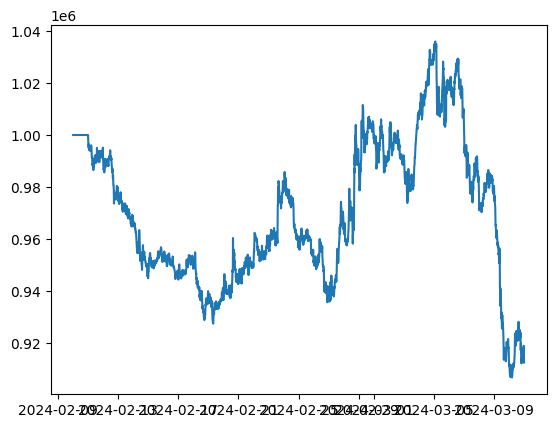

In [9]:
import matplotlib.pyplot as plt 
if not isinstance(results_df, pd.DataFrame):
    results_df = pd.DataFrame(results_df)
else:
    display(results_df.head())

plt.plot(results_df["timestamp"], results_df["principal"])

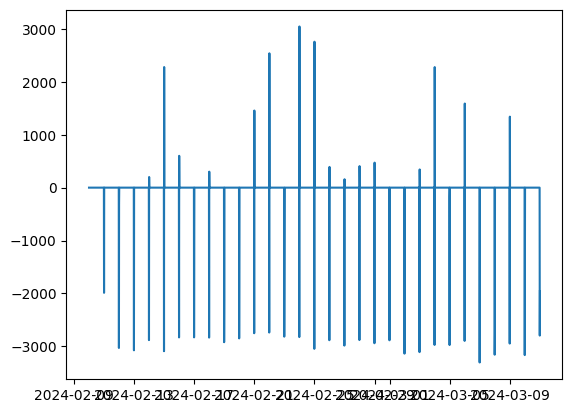

In [10]:
plt.plot(results_df["timestamp"], results_df["return"])


In [11]:
results_df["return"].describe()

count    2881.000000
mean      -29.023986
std       336.303306
min     -3304.636597
25%         0.000000
50%         0.000000
75%         0.000000
max      3046.209234
Name: return, dtype: float64